# **Importing Libraries**

In [1]:
from tensorflow.keras.datasets import mnist

# **Loading Data**

In [2]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data() 

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape , train_labels.shape , test_images.shape , test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
from keras import models
from keras import layers

# **Building the Model Section**

In [5]:
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape = (28*28,)))
model.add(layers.Dense(10,activation = 'softmax'))

# **Compiling the model before training**

In [10]:

model.compile(optimizer='rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


# **Reshaping Train Images**

In [12]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

# **Reshaping Test Images**

In [13]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

# **Training the Model**

In [17]:
result=model.fit(train_images,train_labels,batch_size=128,epochs=10)

Epoch 1/10
469/469 [==============================] - 5s 12ms/step - loss: 0.1154 - accuracy: 0.9674
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1118 - accuracy: 0.9684
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1083 - accuracy: 0.9697
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1050 - accuracy: 0.9706
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1022 - accuracy: 0.9710
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0992 - accuracy: 0.9717
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0965 - accuracy: 0.9728
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0935 - accuracy: 0.9736
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0910 - accuracy: 0.9742
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0886 - accura

# Plotting the Graph

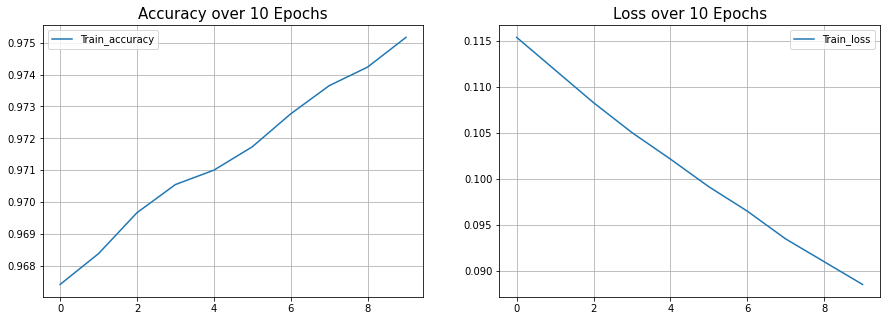

In [19]:
#Plot the accuracy and loss graphs

import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['accuracy']
    loss = result.history['loss']
    #val_acc = result.history['val_accuracy']
    #val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    # plt.plot(range(1,epochs), acc[1:], label='Train_accuracy')
    # plt.plot(range(1,epochs), val_acc[1:], label='Val_accuracy')
    plt.plot(acc, label='Train_accuracy')
    #plt.plot(val_acc, label='Val_accuracy')


    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    # plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    # plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
    plt.plot(loss, label='Train_loss')
    #plt.plot(val_loss, label='Val_loss')


    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 10)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.1060 - accuracy: 0.9697


[0.10597169399261475, 0.9696999788284302]

In [22]:
train_labels[0]

5

In [23]:
test_labels[0]

7

In [24]:
model.predict(test_images)

array([[3.5668047e-06, 6.3867599e-11, 3.5726214e-05, ..., 9.9898773e-01,
        3.3007377e-06, 3.9842285e-05],
       [1.9125617e-05, 3.9818653e-05, 9.9948609e-01, ..., 5.9140412e-15,
        2.8957018e-06, 5.1721679e-16],
       [2.1284052e-06, 9.9293184e-01, 1.3458814e-03, ..., 1.5900551e-03,
        1.9039243e-03, 9.1347014e-05],
       ...,
       [5.9540223e-10, 2.0502662e-10, 8.0611295e-09, ..., 1.5436875e-05,
        2.3995091e-04, 1.0890443e-03],
       [8.5930814e-08, 2.0443757e-07, 1.9428683e-09, ..., 2.3961584e-09,
        2.4554032e-04, 4.0358299e-09],
       [1.4231482e-06, 2.8401923e-13, 1.1445726e-06, ..., 1.3208076e-12,
        3.6797820e-09, 4.1287248e-11]], dtype=float32)